# WeatherPy

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [57]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [ ]:
df = pd.DataFrame(cities)
df[0].value_counts().sort_index().sort_values()

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [84]:
df = pd.DataFrame({
    "City": cities,
    "Cloudiness": "",
    "Country": "",
    "Date": "",
    "Humidity": "",
    "Lat": "",
    "Lng": "",
    "Max Temp (C)": "",
    "Wind Speed": ""
})

In [87]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

for index, row in df.iterrows():
    
    city = row['City']
    query_url = f"{base_url}appid={api_key}&units={units}&q={city}"
    response = requests.get(query_url).json()
    
    try:
        print(f"Processing Record {index} of {len(cities)} | {city}")
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    
    try:
        df.loc[index, 'Cloudiness'] = response['clouds']['all']
        df.loc[index, 'Country'] = response['sys']['country']
        df.loc[index, 'Date'] = response['dt']
        df.loc[index, 'Humidity'] = response['main']['humidity']
        df.loc[index, 'Lat'] = response['coord']['lat']
        df.loc[index, 'Lng'] = response['coord']['lon']
        df.loc[index, 'Max Temp (C)'] = response['main']['temp_max']
        df.loc[index, 'Wind Speed'] = response['wind']['speed']
        
    except (KeyError, IndexError):
        pass

Processing Record 0 of 600 | rikitea
Processing Record 1 of 600 | dikson
Processing Record 2 of 600 | george town
Processing Record 3 of 600 | mahebourg
Processing Record 4 of 600 | cabedelo
Processing Record 5 of 600 | barrow
Processing Record 6 of 600 | jaramana
Processing Record 7 of 600 | hermanus
Processing Record 8 of 600 | thompson
Processing Record 9 of 600 | busselton
Processing Record 10 of 600 | samusu
Processing Record 11 of 600 | new norfolk
Processing Record 12 of 600 | les cayes
Processing Record 13 of 600 | araouane
Processing Record 14 of 600 | ushuaia
Processing Record 15 of 600 | ancud
Processing Record 16 of 600 | baft
Processing Record 17 of 600 | axim
Processing Record 18 of 600 | saint-augustin
Processing Record 19 of 600 | barentsburg
Processing Record 20 of 600 | baker city
Processing Record 21 of 600 | biak
Processing Record 22 of 600 | vaini
Processing Record 23 of 600 | vila franca do campo
Processing Record 24 of 600 | kavieng
Processing Record 25 of 600 | 

Processing Record 207 of 600 | mareeba
Processing Record 208 of 600 | inongo
Processing Record 209 of 600 | souillac
Processing Record 210 of 600 | tabou
Processing Record 211 of 600 | miraflores
Processing Record 212 of 600 | hobyo
Processing Record 213 of 600 | belle glade
Processing Record 214 of 600 | saint anthony
Processing Record 215 of 600 | burgstadt
Processing Record 216 of 600 | marand
Processing Record 217 of 600 | tabas
Processing Record 218 of 600 | maxixe
Processing Record 219 of 600 | broome
Processing Record 220 of 600 | viligili
Processing Record 221 of 600 | berlevag
Processing Record 222 of 600 | wajir
Processing Record 223 of 600 | ayan
Processing Record 224 of 600 | palabuhanratu
Processing Record 225 of 600 | mastic beach
Processing Record 226 of 600 | poum
Processing Record 227 of 600 | turbiv
Processing Record 228 of 600 | juneau
Processing Record 229 of 600 | sharlyk
Processing Record 230 of 600 | kristiinankaupunki
Processing Record 231 of 600 | yumen
Process

Processing Record 410 of 600 | mancio lima
Processing Record 411 of 600 | san juan
Processing Record 412 of 600 | hede
Processing Record 413 of 600 | port lincoln
Processing Record 414 of 600 | along
Processing Record 415 of 600 | kyren
Processing Record 416 of 600 | asau
Processing Record 417 of 600 | mount hagen
Processing Record 418 of 600 | mindelo
Processing Record 419 of 600 | bouna
Processing Record 420 of 600 | saint-philippe
Processing Record 421 of 600 | krasnoselkup
Processing Record 422 of 600 | tongling
Processing Record 423 of 600 | puerto asis
Processing Record 424 of 600 | qaqortoq
Processing Record 425 of 600 | tymovskoye
Processing Record 426 of 600 | bandarbeyla
Processing Record 427 of 600 | kuytun
Processing Record 428 of 600 | constitucion
Processing Record 429 of 600 | te anau
Processing Record 430 of 600 | okhotsk
Processing Record 431 of 600 | marsh harbour
Processing Record 432 of 600 | hamilton
Processing Record 433 of 600 | cumaribo
Processing Record 434 of 

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [90]:
df.to_csv(output_data_file)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp (C),Wind Speed
0,rikitea,100,PF,1561872926,71,-23.12,-134.97,20.85,5.66
1,dikson,5,RU,1561872824,91,73.51,80.55,1.65,2.99
2,george town,75,MY,1561872926,66,5.42,100.33,32,3.6
3,mahebourg,75,MU,1561872717,88,-20.41,57.7,20.56,5.7
4,cabedelo,40,BR,1561873166,100,-6.97,-34.84,22,1.5


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

In [107]:
df['Lat'] = pd.to_numeric(df['Lat'])

def charts(y, c, title, ylabel, ylim, save):
    df.plot(kind='scatter',x='Lat', y=y, c=c, colormap='inferno',sharex=False, figsize=(8,5))
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.ylim(ylim)
    plt.grid()
    plt.savefig(save)
    plt.show()

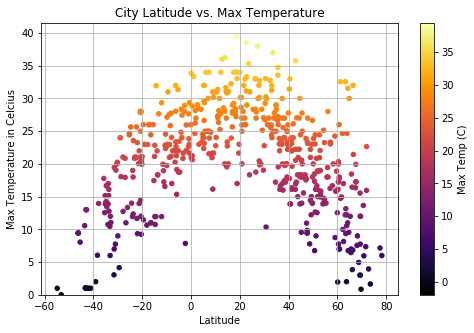

In [113]:
df['Max Temp (C)'] = pd.to_numeric(df['Max Temp (C)'])

charts('Max Temp (C)',
       'Max Temp (C)',
       'City Latitude vs. Max Temperature',
       'Max Temperature in Celcius',
       0,
       'output_data/latvtemp.png')

### Latitude vs. Humidity Plot

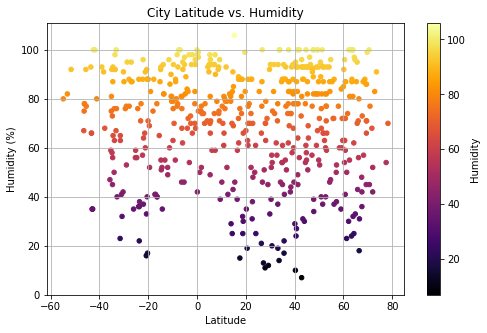

In [114]:
df['Humidity'] = pd.to_numeric(df['Humidity'])

charts('Humidity',
       'Humidity',
       'City Latitude vs. Humidity',
       'Humidity (%)',
       0,
       'output_data/latvhumidity.png')

### Latitude vs. Cloudiness Plot

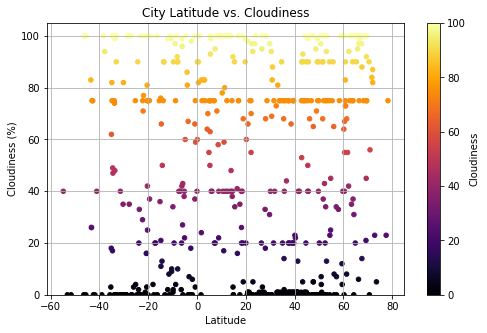

In [115]:
df['Cloudiness'] = pd.to_numeric(df['Cloudiness'])

charts('Cloudiness',
       'Cloudiness',
       'City Latitude vs. Cloudiness',
       'Cloudiness (%)',
       0,
       'output_data/latvcloud.png')

### Latitude vs. Wind Speed Plot

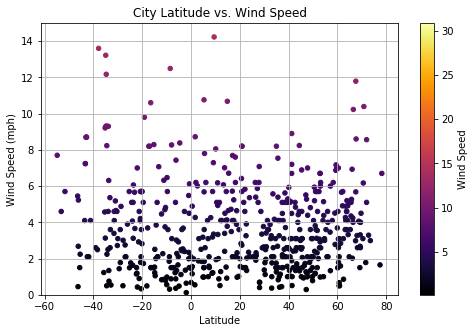

In [116]:
df['Wind Speed'] = pd.to_numeric(df['Wind Speed'])

charts('Wind Speed',
       'Wind Speed',
       'City Latitude vs. Wind Speed',
       'Wind Speed (mph)',
       (0,15),
       'output_data/latvwind.png')